In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

E:\Anaconda\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
mnist = tf.keras.datasets.mnist
(x_train , y_train),(x_test,y_test) = mnist.load_data()

In [3]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer = "adam" , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train , y_train , epochs=3)
prediction = model.predict([x_test])

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 15s 243us/sample - loss: 0.2610 - acc: 0.9227
Epoch 2/3
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1061 - acc: 0.9678
Epoch 3/3
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0720 - acc: 0.9775


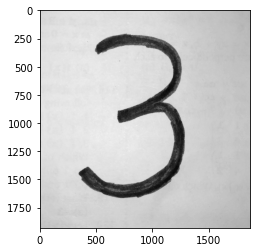

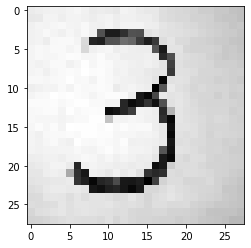

Pridicted digit is : 3


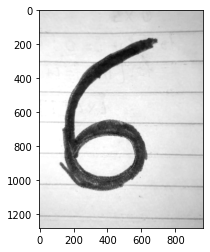

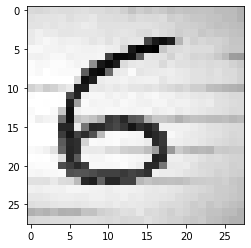

Pridicted digit is : 6


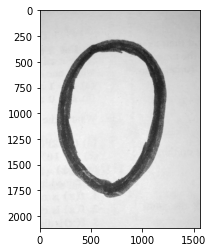

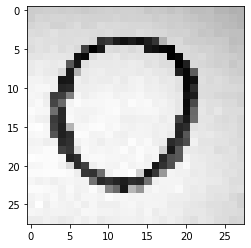

Pridicted digit is : 0


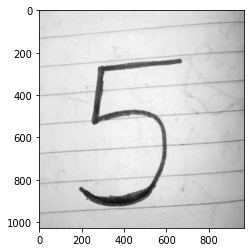

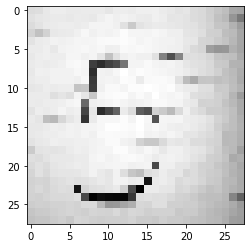

Pridicted digit is : 5


In [17]:
from tkinter import*
from tkinter import filedialog
root=Tk()
root.geometry("250x250")

def open():
    result= filedialog.askopenfilename(initialdir="/",filetypes=(("image file","*.jpg;*.png;*.jpeg"),("all types", "*.*")))
    #print(result)
    img=cv2.imread(result,0)
    img=cv2.bitwise_not(img)
    #print(img.size)
    plt.imshow(img,cmap=plt.cm.binary)
    plt.show()
    img_array=cv2.resize(img,(28,28))
    plt.imshow(img_array,cmap=plt.cm.binary)
    plt.show()
    user_test=tf.keras.utils.normalize(img_array,axis=1)
    predicted=model.predict([[user_test]])
    print('Pridicted digit is : {0}'.format(np.argmax(predicted[0])))
button = Button(root,text="open file",command=open)
button.pack()
root.mainloop()